In [1]:
import matplotlib.pyplot as plt
import numpy as np


c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


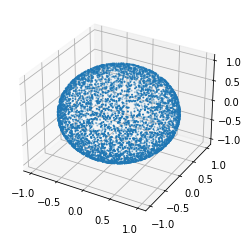

In [2]:
plt.rcParams["figure.figsize"] = [7.00, 7.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
r = 0.05
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
# ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r, )

N = 5000
xs = (np.random.normal(0, 1, N))
ys = (np.random.normal(0, 1, N))
zs = (np.random.normal(0, 1, N))
# np.concatenate(xs, ys, zs)
random_vectors = np.array([xs, ys, zs]).T
random_unit_vectors = np.zeros(shape=random_vectors.shape)
for i in range(random_vectors.shape[0]):
    random_unit_vectors[i] = random_vectors[i] / np.linalg.norm(random_vectors[i])

ax.scatter(random_unit_vectors[:, 0], random_unit_vectors[:, 1], random_unit_vectors[:, 2], s=1)


plt.show()

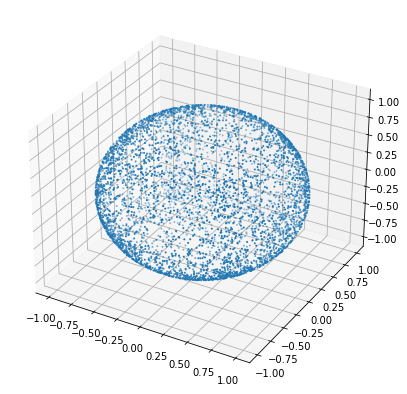

In [3]:
plt.rcParams["figure.figsize"] = [7.00, 7.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
r = 0.05
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
# ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r, )

N = 5000
xs = (np.random.random(N) - 0.5) * 2
ys = (np.random.random(N) - 0.5) * 2
zs = (np.random.random(N) - 0.5) * 2
# np.concatenate(xs, ys, zs)
random_vectors = np.array([xs, ys, zs]).T
random_unit_vectors = np.zeros(shape=random_vectors.shape)
for i in range(random_vectors.shape[0]):
    random_unit_vectors[i] = random_vectors[i] / np.linalg.norm(random_vectors[i])

ax.scatter(random_unit_vectors[:, 0], random_unit_vectors[:, 1], random_unit_vectors[:, 2], s=1)


plt.show()

In [4]:
xs = (np.random.random(100) - 0.5) * 2
ys = (np.random.random(100) - 0.5) * 2
zs = (np.random.random(100) - 0.5) * 2
# np.concatenate(xs, ys, zs)
random_vectors = np.array([xs, ys, zs]).T
random_unit_vectors = np.zeros(shape=random_vectors.shape)
for i in range(random_vectors.shape[0]):
    random_unit_vectors[i] = random_vectors[i] / np.linalg.norm(random_vectors[i])


ax.scatter(random_unit_vectors[:, 0], random_unit_vectors[:, 1], random_unit_vectors[:, 2])
plt.show()

In [5]:
import plotly.graph_objects as go
import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [17]:
# Read data from a csv
import plotly.express as px

N = 10000
xs = (np.random.random(N) - 0.5) * 2
ys = (np.random.random(N) - 0.5) * 2
zs = (np.random.random(N) - 0.5) * 2
xs = (np.random.normal(0, 1, N))
ys = (np.random.normal(0, 1, N))
zs = (np.random.normal(0, 1, N))

random_vectors = np.array([xs, ys, zs]).T
random_unit_vectors = np.zeros(shape=random_vectors.shape)
for i in range(random_vectors.shape[0]):
    random_unit_vectors[i] = random_vectors[i] / np.linalg.norm(random_vectors[i])

df = pd.DataFrame(random_unit_vectors, columns=["X", "Y", "Z"])

fig = px.scatter_3d(df, x='X', y='Y', z='Z', color='Z')
fig.show()